# Business Understanding

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import data from a CSV file
df = pd.read_csv('California_Houses.csv')
df.head()

# Rename Distance_to_LA column to Distance_to_LosAngeles
df.rename(columns={'Distance_to_LA':'Distance_to_LosAngeles'}, inplace=True) # For consistent naming standard

### Contextualising the problem...

**Data mining** is a field that focuses on extracting insights and patterns from large datasets. That as of itself already constitutes a strong argument in favour of using such a process when tackling business problems, but there is still more to it.

In this analysis, we will approach the complex market of housing. Specifically, the one in California, which has been undergoing a significant shortage ever since the 70s, later originating various problems during the decade of 1990. This fact is relevant since it falls under the scope of this dataset.

Therefore, it is important to mention that this data is not particularly helpful at predicting current housing prices. Nonetheless, it serves as valuable ground for emulating the tackling of a panoply of issues at the time. Looking at a small example to illustrate the stress felt at that point regarding housing, over 465.000 families in California were placed on waiting lists for public housing, and such lists could go on for up to 8 years (Williams, 2000).

As such, this project proposes to answer the following problem statement:

**Given the highly stressed Californian housing market of the 90s, how can we accurately predict the pricing of houses by leveraging demographic, property, and geographical data - and what insights can the developed models provide to systematise and further advise both house buyers and sellers?**

### Expanding on the objectives of the project...

This notebook implements two distinct approaches for predicting the value of Californian houses in the 1990s. One features demographic and property data in a **linear regression model**, while the other achieves that goal by additionally feeding geographical data into a **random forest regression**. Model selection is also performed after comparing the two.

Diving further, the models will allow us to establish an hierarchy assessing how meaningful certain variables are to determining what impacts the value of a house the most. This is highly relevant to our business problem, since it will provide insights regarding what home buyers and sellers can expect from either constructing new or searching for houses featuring certain characteristics.

This pricing systematisation can also speed up the process for every involved party, all the while reducing overestimated arbitrary pricing that can be a burden for the many people waiting for a house.

The project features a phase of exploratory data analysis (EDA), where data cleaning and feature engineering are conducted. After doing so, the models are implemented and validated, maintaining an appropriate evaluation metric selection. Final insights will be drawn at the end, allowing us to relate the analysis to our problem statement.

### How can using data mining techniques aid us at solving the issue of the housing scarcity felt in California in the 90s?

< talk potential DM benefits >

< ID data mining techniques in a pipeline format? >

# 1) EDA

In [ ]:
# Display basic statistics
print(df.describe())

       Median_House_Value  Median_Income    Median_Age     Tot_Rooms  \
count        20640.000000   20640.000000  20640.000000  20640.000000   
mean        206855.816909       3.870671     28.639486   2635.763081   
std         115395.615874       1.899822     12.585558   2181.615252   
min          14999.000000       0.499900      1.000000      2.000000   
25%         119600.000000       2.563400     18.000000   1447.750000   
50%         179700.000000       3.534800     29.000000   2127.000000   
75%         264725.000000       4.743250     37.000000   3148.000000   
max         500001.000000      15.000100     52.000000  39320.000000   

       Tot_Bedrooms    Population    Households      Latitude     Longitude  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean     537.898014   1425.476744    499.539680     35.631861   -119.569704   
std      421.247906   1132.462122    382.329753      2.135952      2.003532   
min        1.000000      3.000000  

In [ ]:
# Check for missing values
print(df.isnull().sum())

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LosAngeles      0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


There are no missing values in the data set. Therefore, we ballin

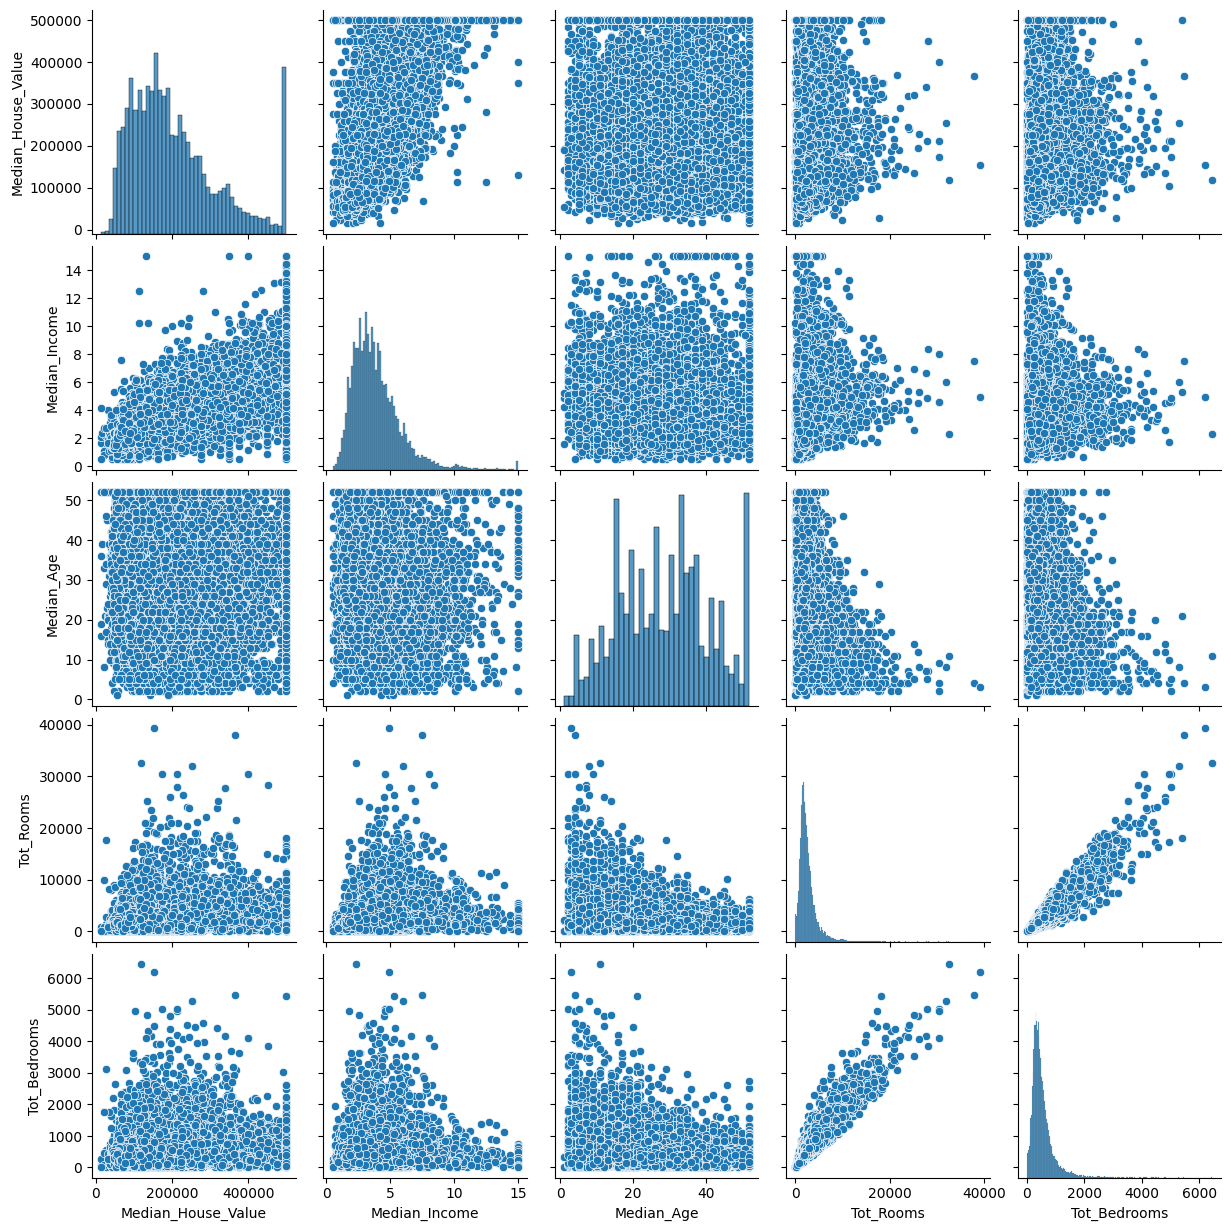

In [ ]:
# Pairplot for a subset of columns
sns.pairplot(df[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms']])
plt.show()

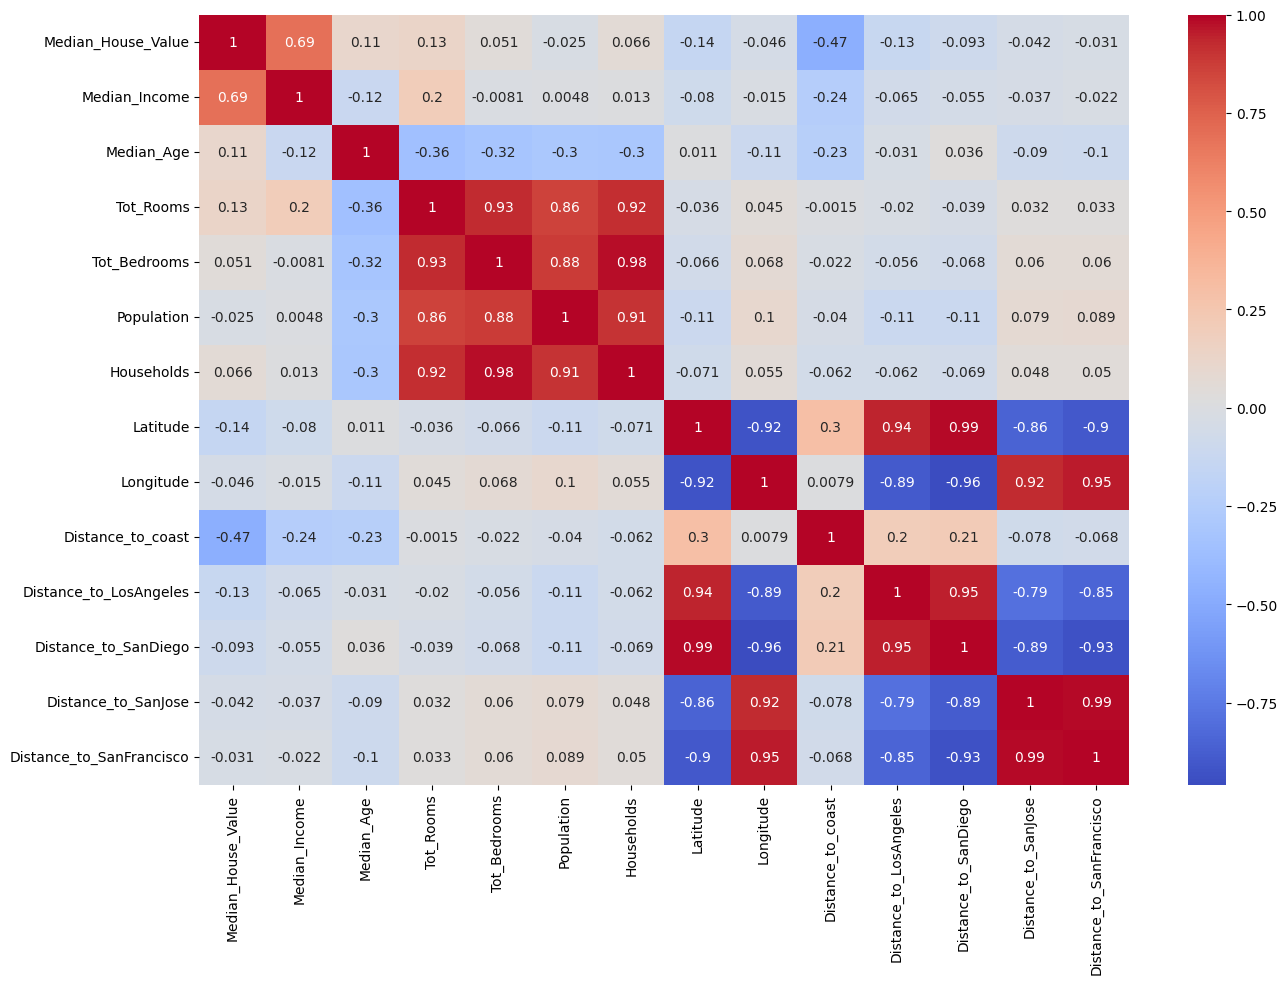

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

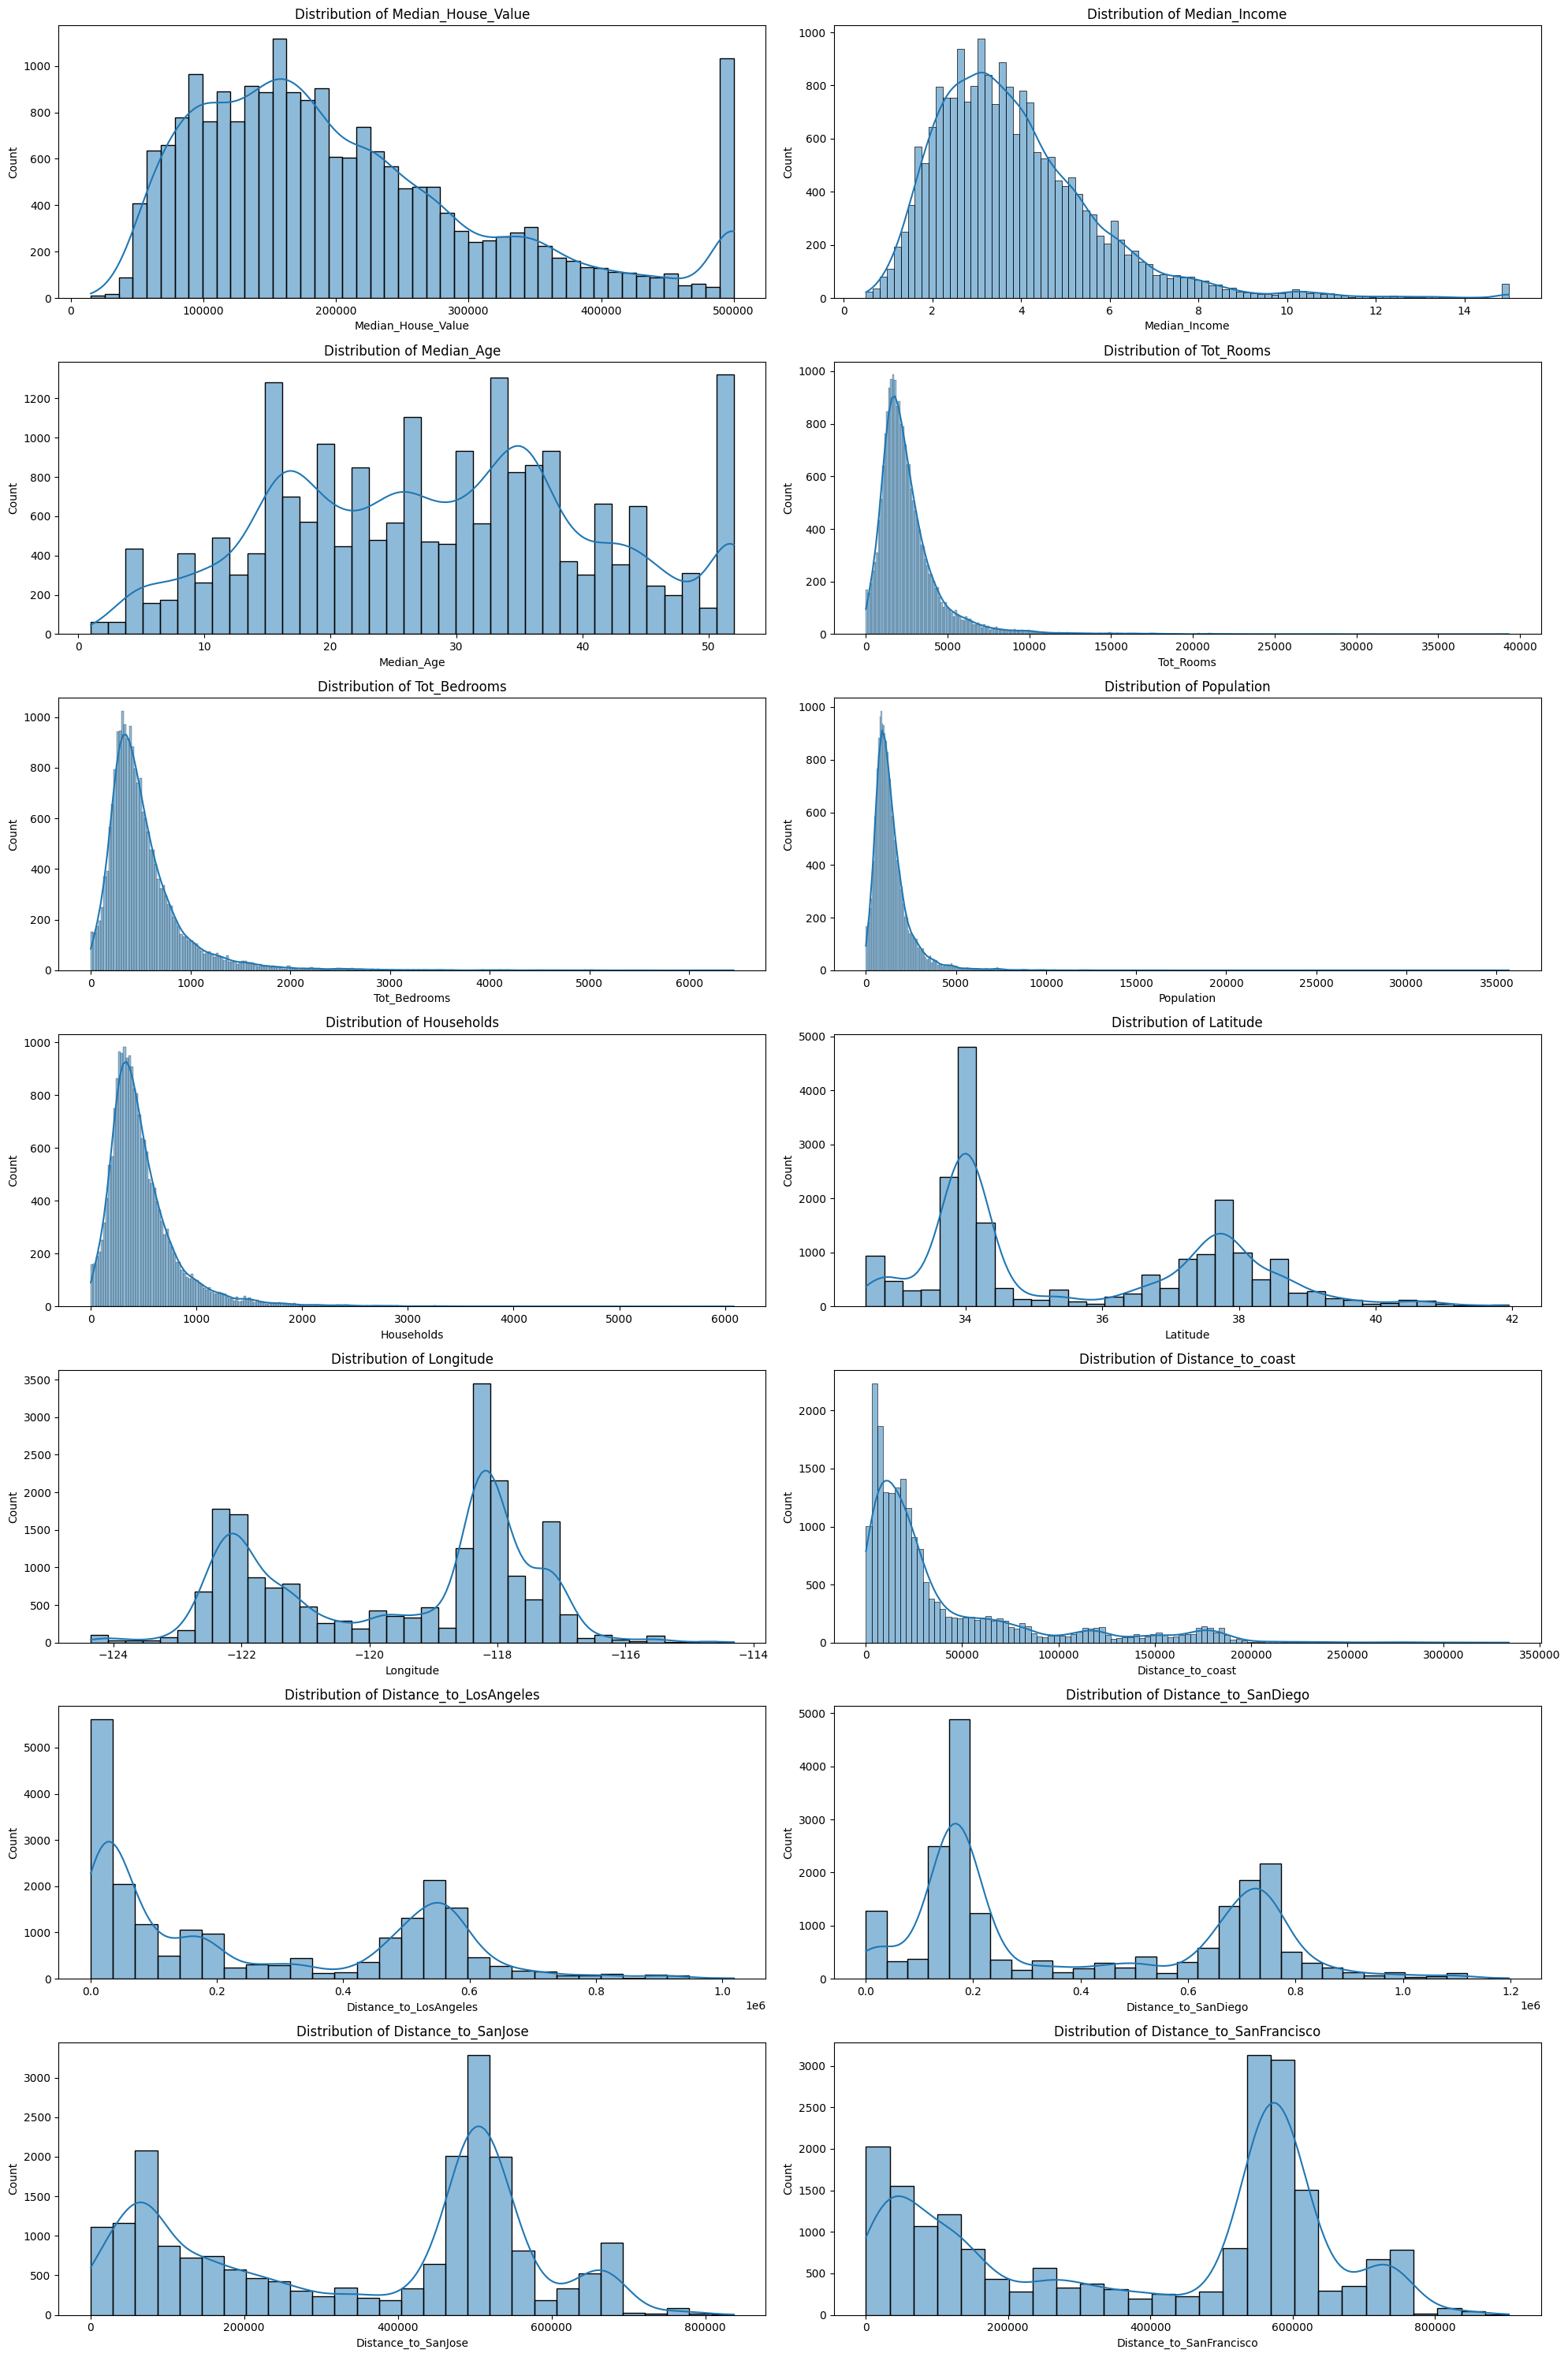

In [ ]:
# Plot density plots for all variables in a single figure
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Examining the plots we can detect two sperate clusters located in california as distance wise all the distribution graphs cumulated around 2 different points.

In [ ]:
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LosAngeles,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


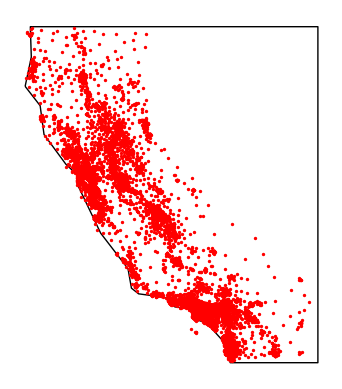

In [ ]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)


world = gpd.read_file(get_path("naturalearth.land"))

# We restrict to California.
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=2)

# Remove axes completely
ax.axis('off')

plt.show()

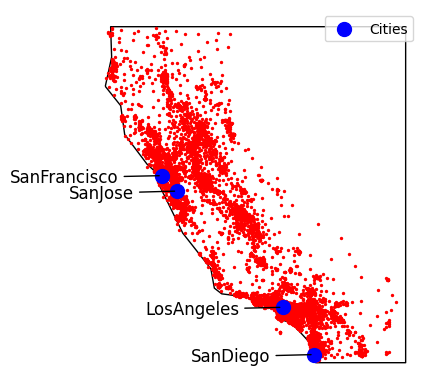

In [ ]:
# Create a DataFrame for the cities with their coordinates
cities_data = {
    'City': ['SanJose', 'SanFrancisco', 'LosAngeles', 'SanDiego'],
    'Latitude': [37.3382, 37.7749, 34.0522, 32.7157],
    'Longitude': [-121.8863, -122.4194, -118.2437, -117.1611]
}

df_cities = pd.DataFrame(cities_data)

# Convert the DataFrame to a GeoDataFrame
gdf_cities = gpd.GeoDataFrame(
    df_cities, geometry=gpd.points_from_xy(df_cities.Longitude, df_cities.Latitude), crs="EPSG:4326"
)



# Plot the cities on the map
ax = world.clip([-130,32.5,-114,42]).plot(color="white", edgecolor="black")
gdf.plot(ax=ax, color="red", markersize=2)
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.legend()
plt.show()

C:\Users\doruk\AppData\Local\Temp\ipykernel_88876\3164632962.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  grid['counts'].fillna(0, inplace=True)
C:\Users\doruk\AppData\Local\Temp\ipykernel_88876\3164632962.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grid_centroids = grid.geometry.centroid
C:\Users\doruk\AppData\Local\Temp\ipykernel_88876\3164632962.py:56: UserWarning: No 

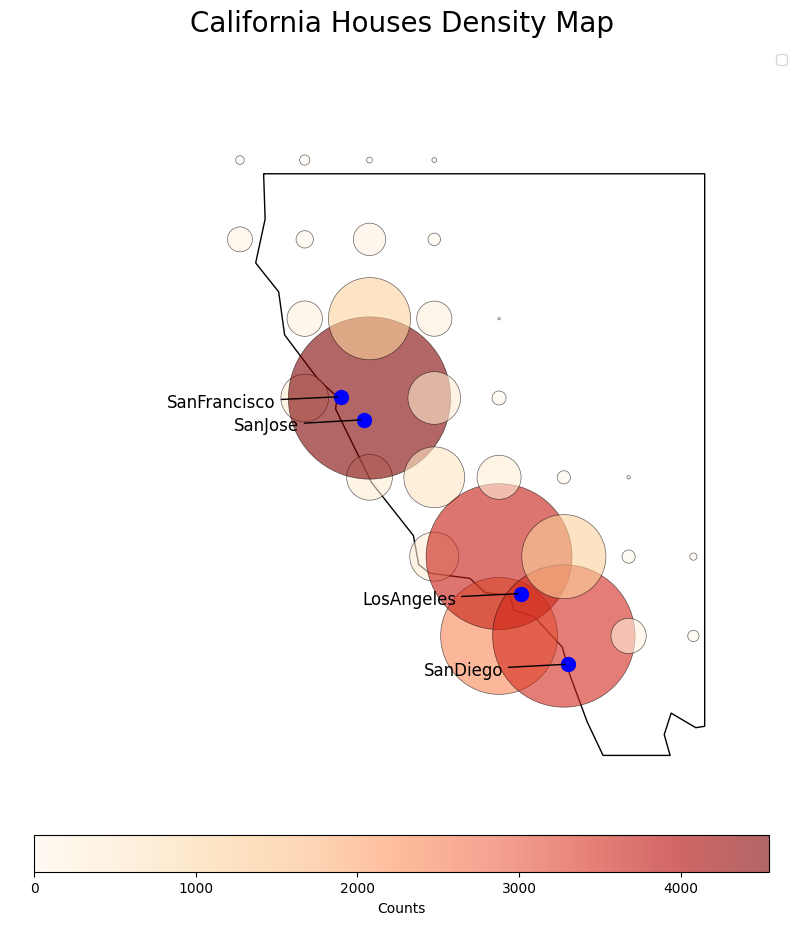

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from geopandas.datasets import get_path


# Create a grid of polygons over the area of interest
xmin, ymin, xmax, ymax = -130, 32.5, -114, 42
cell_size = 1.5
grid_cells = []
for x in np.arange(xmin, xmax + cell_size, cell_size):
    for y in np.arange(ymin, ymax + cell_size, cell_size):
        grid_cells.append(box(x, y, x + cell_size, y + cell_size))
grid = gpd.GeoDataFrame(grid_cells, columns=['geometry'], crs="EPSG:4326")

# Perform spatial join to count points in each grid cell
joined = gpd.sjoin(gdf, grid, how='left', predicate='within')
grid['counts'] = joined.groupby('index_right').size()
grid['counts'].fillna(0, inplace=True)

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world.clip([-130, 31, -114, 42]).plot(ax=ax, color="white", edgecolor="black") #Dimensions for california

# Plot the grid as bubbles
grid_centroids = grid.geometry.centroid
sc = ax.scatter(grid_centroids.x, grid_centroids.y, s=grid['counts']*3, c=grid['counts'], cmap='OrRd', alpha=0.6, edgecolor='k', linewidth=0.5)

# Add a colorbar
cbar = plt.colorbar(sc, ax=ax, orientation='horizontal', pad=0.05, shrink=0.5)
cbar.set_label('Counts')

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="blue", markersize=100, marker='o')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# subplot title
plt.suptitle('California Houses Density Map', fontsize=20)

# Remove empty space around the plot
plt.tight_layout()

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

In [ ]:
# # Load the GeoJSON file
# gdf_counties = gpd.read_file('gadm41_USA_2.json')

# # Filter for California counties
# gdf_california = gdf_counties[gdf_counties['NAME_1'] == 'California']

# # Merge the GeoDataFrame with the df DataFrame
# gdf_california = gdf_california.merge(df, left_on='NAME_2', right_on='County_Name')

# # Plot the merged GeoDataFrame
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# gdf_california.plot(column='Median_House_Value', ax=ax, legend=True,
#                     legend_kwds={'label': "Median House Value by County",
#                                  'orientation': "horizontal"})
# plt.title('Median House Value by County in California')
# plt.show()

In [ ]:
# Create new Closest City column for Los Angeles and San Francisco Sanjose and San Diego using distance collumnns
df['Closest_Distance'] = df[[column for column in df.columns if column.startswith('Distance_')]].min(axis=1)

In [ ]:
# Create new Closest City column for Los Angeles and San Francisco Sanjose and San Diego using distance collumnns
selected_columns = [column for column in df.columns if column.startswith('Distance_')]
selected_columns.remove('Distance_to_coast')
df['Closest_Distance'] = df[selected_columns].min(axis=1)

df['Closest_City'] = np.where(df['Distance_to_LosAngeles'] == df['Closest_Distance'], 'LosAngeles',
                     np.where(df['Distance_to_SanDiego'] == df['Closest_Distance'], 'SanDiego',
                     np.where(df['Distance_to_SanJose'] == df['Closest_Distance'], 'SanJose', 'SanFrancisco')))

# Display the first few rows to verify the new column
df.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LosAngeles,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,Closest_Distance,Closest_City
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767,21250.213767,SanFrancisco
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400,20880.600400,SanFrancisco
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450,18811.487450,SanFrancisco
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,18031.047568,SanFrancisco
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568,18031.047568,SanFrancisco


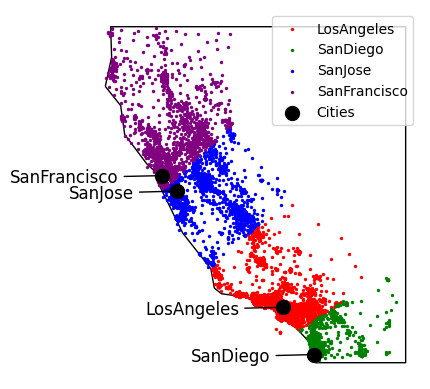

In [ ]:
# Map the points into a map, keeping the city points and using the Closest_City column to color the points

# Define colors for each city
colors = {'LosAngeles': 'red', 'SanDiego': 'green', 'SanJose': 'blue', 'SanFrancisco': 'purple'}

# Create a GeoDataFrame for the points with the closest city
gdf['Closest_City'] = df['Closest_City']

# Plot the world map restricted to California
ax = world.clip([-130, 32.5, -114, 42]).plot(color="white", edgecolor="black")

# Plot the points colored by the closest city
for city, color in colors.items():
    gdf[gdf['Closest_City'] == city].plot(ax=ax, color=color, markersize=2, label=city)

# Plot the cities on the map
gdf_cities.plot(ax=ax, color="black", markersize=100, marker='o', label='Cities')

# Add labels for the cities with an offset to the left and a line connecting to the point
for x, y, label in zip(gdf_cities.geometry.x, gdf_cities.geometry.y, gdf_cities['City']):
    ax.annotate(label, xy=(x, y), xytext=(x - 1.5, y - 0.2),
                textcoords='data', fontsize=12, ha='right',
                arrowprops=dict(arrowstyle="-", color='black'))

# Remove axes completely
ax.axis('off')

# Move the legend to the right
plt.legend(loc='upper right')
plt.show()

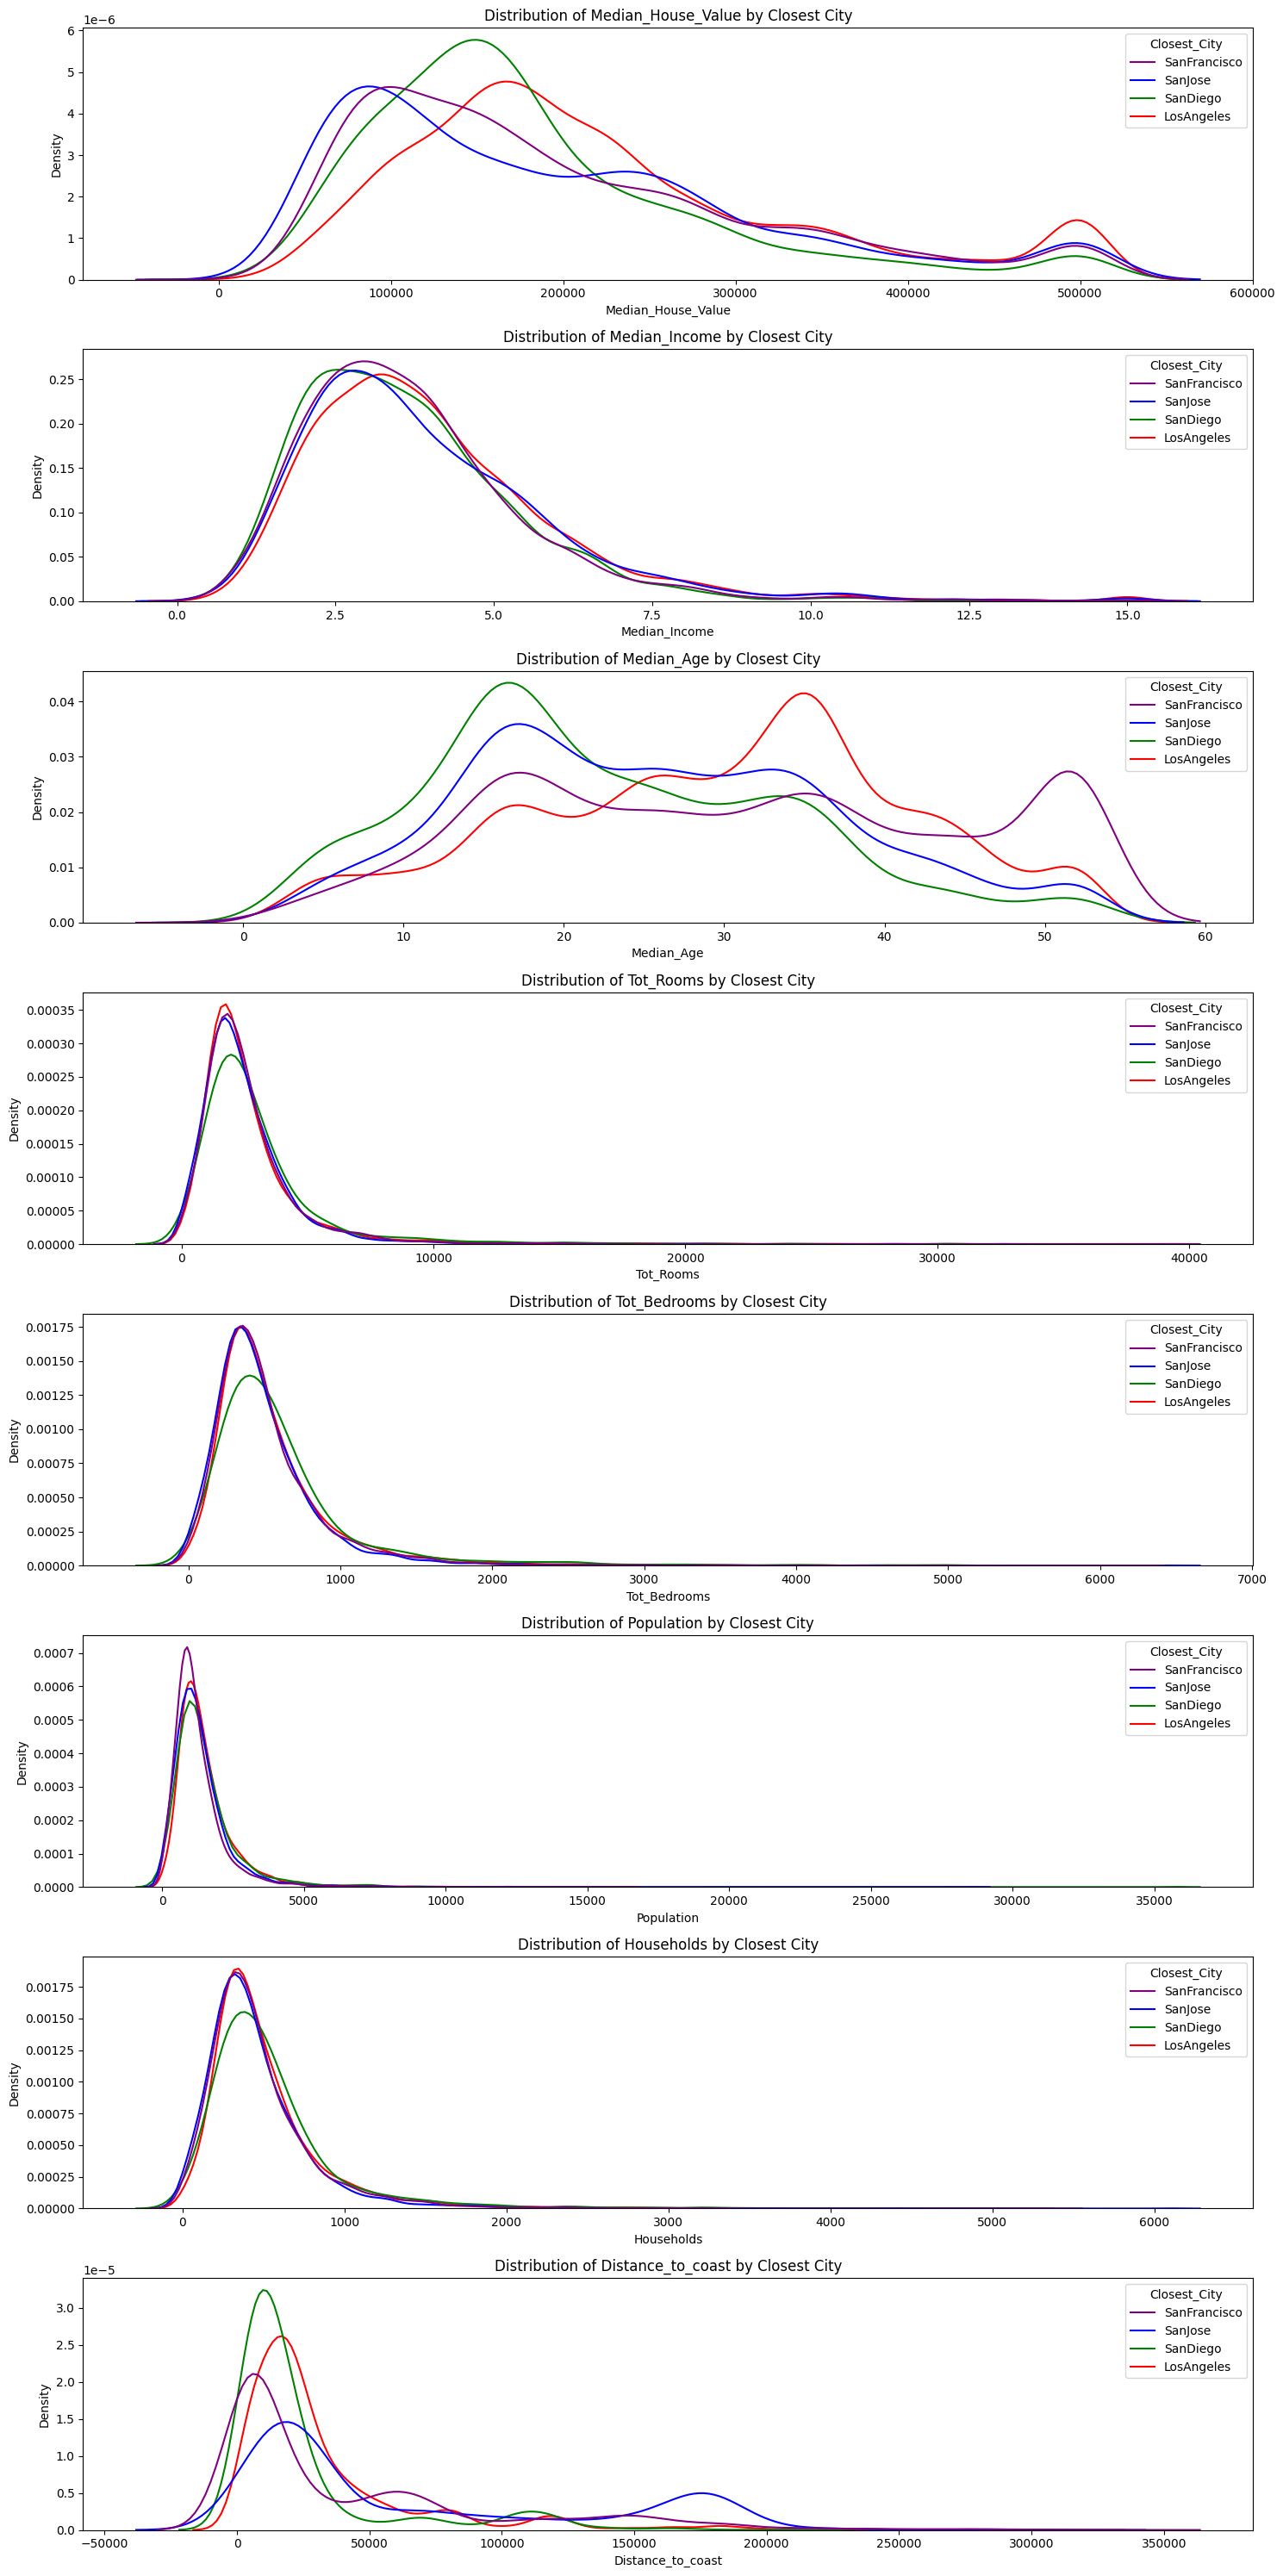

In [ ]:
columns_to_plot = [col for col in df.columns if col not in ['Longitude', 'Latitude',
                                                            'Distance_to_LosAngeles', 'Distance_to_SanDiego', 'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                            'Closest_Distance', 'Closest_City']]

# Create density plots for each column
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.kdeplot(data=df, x=col, hue='Closest_City', common_norm=False, palette=colors, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Closest City')

plt.tight_layout()
plt.show()

# 2) Regression Models

## Linear Regression:

In [ ]:
# Select the features and target variable
X = df[['Median_Income', 'Median_Age', 'Tot_Rooms', 'Tot_Bedrooms', 'Population', 'Households']]
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 5862574352.968272
Coefficients: [ 91325.09220035  23906.19520346 -43497.74884467  42713.1788278
 -40536.87160442  48392.8781107 ]
Intercept: 207194.6937378876


In [ ]:
# Summary of the linear regression model
print("Linear Regression Model Summary")
print("--------------------------------")
print(f"Intercept: {model.intercept_}")
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f"\nMean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Linear Regression Model Summary
--------------------------------
Intercept: 207194.6937378876
Coefficients:
  Median_Income: 91325.0922003542
  Median_Age: 23906.19520345863
  Tot_Rooms: -43497.74884466613
  Tot_Bedrooms: 42713.178827797594
  Population: -40536.871604424094
  Households: 48392.878110702186

Mean Squared Error: 5862574352.968272
R-squared: 0.5526149125719343


In [ ]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_const = sm.add_constant(X_train_scaled)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_const).fit()

# Print the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Median_House_Value   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     3648.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:50:59   Log-Likelihood:            -2.0896e+05
No. Observations:               16512   AIC:                         4.179e+05
Df Residuals:                   16505   BIC:                         4.180e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.072e+05    590.085    351.127      0.0

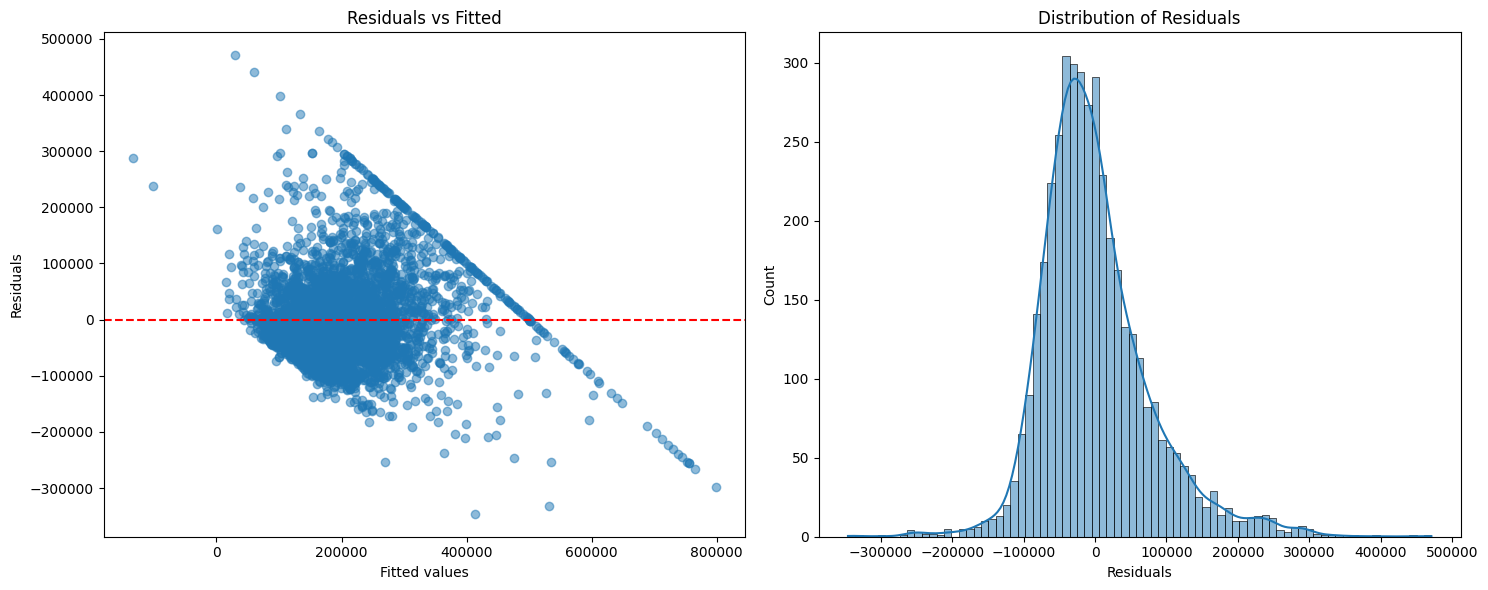

R-squared: 0.5526149125719343


In [ ]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(15, 6))

# Residuals vs Fitted
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Calculate and print R-squared
r_squared = model.score(X_test_scaled, y_test)
print(f'R-squared: {r_squared}')



In [ ]:
# from statsmodels.graphics.regressionplots import plot_leverage_resid2
# from statsmodels.graphics.regressionplots import influence_plot

# # Create leverage vs. residuals plot with influence lines
# fig, ax = plt.subplots(figsize=(12, 8))
# plot_leverage_resid2(model_sm, ax=ax)

# # Add Cook's distance lines
# influence_plot(model_sm, criterion="cooks", ax=ax, alpha=0.05, size=2)

# plt.show()

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Select the features and target variable
features = [col for col in df.columns if col not in ['Median_House_Value', 'Longitude', 'Latitude',
                                                     'Distance_to_LosAngeles', 'Distance_to_SanDiego',
                                                     'Distance_to_SanJose', 'Distance_to_SanFrancisco',
                                                     'Closest_Distance', 'Closest_City']]
X = df[features]
y = df['Median_House_Value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Print the feature importances
importances = rf_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

Mean Squared Error (Random Forest): 3774104995.124923
             Feature  Importance
0      Median_Income    0.506226
6  Distance_to_coast    0.232775
4         Population    0.068157
1         Median_Age    0.061749
3       Tot_Bedrooms    0.051046
2          Tot_Rooms    0.040404
5         Households    0.039643


In [ ]:
import statsmodels.api as sm

# Calculate Mean Squared Error (MSE) for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (Linear Regression): {mse_lr}')

# Calculate Mean Absolute Percentage Error (MAPE) for Linear Regression
mape_lr = mean_absolute_percentage_error(y_test, y_pred)
print(f'Mean Absolute Percentage Error (Linear Regression): {mape_lr}')

# Fit the model using statsmodels to get AIC and BIC
X_test_const = sm.add_constant(X_test_scaled)
model_sm = sm.OLS(y_test, X_test_const).fit()

# AIC and BIC calculation
aic_lr = model_sm.aic
bic_lr = model_sm.bic
print(f'AIC (Linear Regression): {aic_lr}')
print(f'BIC (Linear Regression): {bic_lr}')


Mean Squared Error (Linear Regression): 5862574352.968272
Mean Absolute Percentage Error (Linear Regression): 0.3464523443969493
AIC (Linear Regression): 104570.02753224366
BIC (Linear Regression): 104614.3063703938


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')

# Calculate Mean Absolute Percentage Error (MAPE)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'Mean Absolute Percentage Error (Random Forest): {mape_rf}')

# Calculate AIC and BIC
n = len(y_test)
p = X_test.shape[1]

# AIC calculation
aic_rf = n * np.log(mse_rf) + 2 * p
print(f'AIC (Random Forest): {aic_rf}')

# BIC calculation
bic_rf = n * np.log(mse_rf) + p * np.log(n)
print(f'BIC (Random Forest): {bic_rf}')

Mean Squared Error (Random Forest): 3774104995.124923
Mean Absolute Percentage Error (Random Forest): 0.24622178398352806
AIC (Random Forest): 91042.29934194613
BIC (Random Forest): 91086.57818009626


In [ ]:
# Generate predictions for each tree in the Random Forest
all_tree_predictions = np.array([tree.predict(X_test) for tree in rf_model.estimators_])

# Calculate the prediction interval (e.g., 95% prediction interval)
lower_bound = np.percentile(all_tree_predictions, 2.5, axis=0)
upper_bound = np.percentile(all_tree_predictions, 97.5, axis=0)

# Calculate the percentage of the actual test data that falls within the interval
within_interval = np.mean((y_test >= lower_bound) & (y_test <= upper_bound)) * 100

print(f'Percentage of test data within the 95% prediction interval: {within_interval:.2f}%')

Percentage of test data within the 95% prediction interval: 92.27%


c:\Users\doruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\doruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\doruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\doruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
c:\Users\doruk\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature nam

In [ ]:
# Generate predictions for the linear regression model
y_pred_lr = model.predict(X_test_scaled)

# Calculate the prediction intervals using np.percentile
lower_bound_lr = np.percentile(y_pred_lr, 2.5)
upper_bound_lr = np.percentile(y_pred_lr, 97.5)

# Calculate the percentage of the actual test data that falls within the interval
within_interval_lr = np.mean((y_test >= lower_bound_lr) & (y_test <= upper_bound_lr)) * 100

print(f'Percentage of test data within the 95% prediction interval (Linear Regression): {within_interval_lr:.2f}%')


Percentage of test data within the 95% prediction interval (Linear Regression): 83.04%


# Bibliography

Williams, A. K. (2000). The long wait: The critical shortage of housing in California. Housing California.